# Ex04 - Filtragem de Imagens

## Resolução Exercício 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

from IPython.display import Image
from IPython.display import display
import skimage
from scipy.ndimage import gaussian_filter
from PIL import Image

In [434]:
#Função inspirada no trabalho do Mauro Brandão para mostrar as imagens
def disp(f, n_img):
    from PIL import Image
    import matplotlib.pyplot as plt
    
    images=[]
    for f_i in f:
        images.append(Image.fromarray(np.uint8(f_i)))
 
    # tamanho do display de cada imagem 
    dpi=72  # padrao da funcao display da biblioteca PIL
    altura,largura=images[0].size # em pixels (assumimos o mesmo tamanho para todas)
    figsizeinches=largura/float(dpi),altura/float(dpi) # em polegadas
    fig = plt.figure(figsize=figsizeinches)
    
    # valores iniciais
    xpos=0
    ypos=0
    espacamento=0.02
    tam=1
    
    #mod
    max_row_size=n_img
    i=0
    
    for image in images:
        ax=fig.add_axes([xpos,ypos,tam,tam]) 
        ax.axis('off')
        ax.imshow(image)
        
        # incrementos
        i=i+1                  # contagem de figuras
        if i%max_row_size==0:  # troca de linha
            xpos=0
            ypos=ypos-tam-espacamento
        else:                  # continua na linha
            xpos=xpos+tam+espacamento
    plt.show()

#### Filtro da média

In [435]:
f = np.zeros((5,5))
f[2][2] = 1
print 'f=\n', f

f2 = np.zeros((5,5))
f2[1][1] = 1
print 'f2=\n', f2

h = np.ones((3,3))/(3*3)
print 'h= \n', h, '\n'

fia = ia.conv(f, h)
print 'f convoluido com h utilizando o ia =', '\n', fia

convfh = signal.convolve(f, h, mode='full')
print 'f convoluído com h utilizando o scipy com mode=full=', '\n', convfh, '\n'

convfh = signal.convolve(f2, h, mode='valid')
print 'f convoluído com h utilizando o scipy com mode=valid =', '\n', convfh, '\n'

convfh = signal.convolve(f, h, mode='same')
print 'f convoluído com h utilizando o scipy com mode=same =', '\n', convfh, '\n'

f=
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
f2=
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
h= 
[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]] 

f convoluido com h utilizando o ia = 
[[ 0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.11111111  0.11111111  0.11111111  0.          0.        ]
 [ 0.          0.          0.11111111  0.11111111  0.11111111  0.          0.        ]
 [ 0.          0.          0.11111111  0.11111111  0.11111111  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.

Obs.: Não fui utilizado o np.convolve, pois ele trabalha apenas com 1 dimensão e a matriz é composta por 2. Podemos observar o filtro de média convoluído com a imagem gerada de uma maneira mais simples. Além disso, é possível observar que ambas as funções utilizam tratamento de borda. Pode se observar também diferentes modos da função scipy.signal.convolve. O modo 'full' representa a matriz inteira de tamanho N+M-1, o modo 'valid' representa o tamanho da imagem sem as bordas (ou seja, essa função elimina a borda causada pelo tratamento de borda na convolução) e o modo 'same' representa o tamanho da imagem de entrada.

In [436]:
img = Image.open('../data/fig.jpg').convert('L')

tamanhos: original= (260, 261) , full= (263, 262) , valid= (259, 258) , same= (261, 260) , ia= (263, 262)


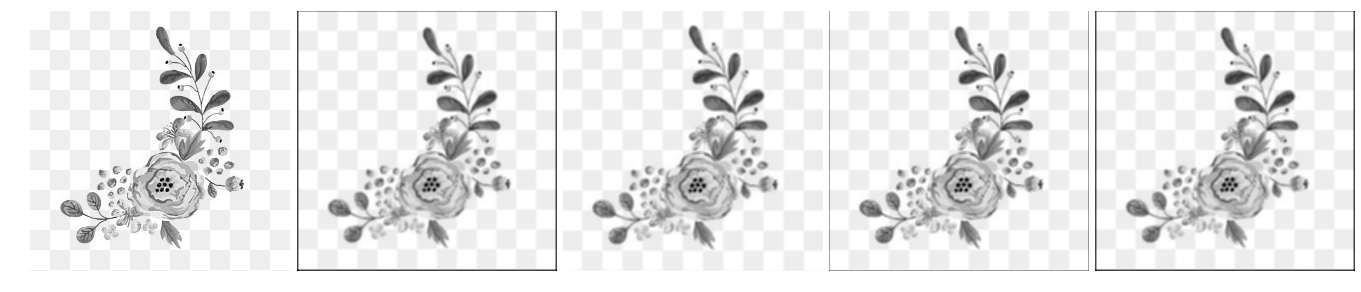

In [437]:
convfig = signal.convolve(img, h, mode='full')
convfig2 = signal.convolve(img, h, mode='valid')
convfig3 = signal.convolve(img, h, mode='same')
fia2 = ia.conv(img, h)

print 'tamanhos: original=', img.size, ', full=', convfig.shape, ', valid=', convfig2.shape, ', same=', convfig3.shape, ', ia=', fia2.shape

disp([img, convfig, convfig2, convfig3, fia2], 5)

Na imagem acima, podemos observar os efeitos causados na borda em relação aos modos da função scipy. A primeira imagem é a original, seguida dos filtros médios convoluídos com as funções do scipy 'full', 'valid', 'same' e a última imagem representa a imagem convoluída com o toolbox da aula. Podemos observar também o efeito do filtro da média em reduzir a nitidez da imagem.

#### Moficando o tamanho da máscara

tamanho h: 9


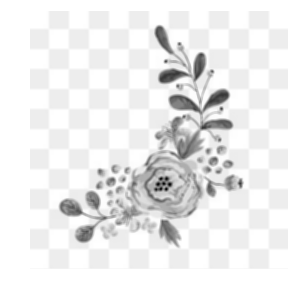

tamanho h: 25


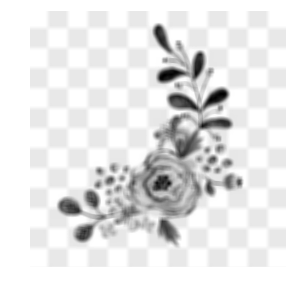

tamanho h: 49


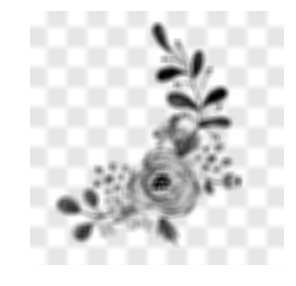

In [438]:
for i in range(3, 8, 2):
    hx = np.ones((i,i))/(i*i)
    print 'tamanho h:', hx.size
    conv = signal.convolve(img, hx, mode='valid')
    #display(conv)
    #plt.subplot(121)
    disp([conv], 1)

Pode-se notar que conforme aumenta o tamanho da janela do filtro de média, a imagem vai ficando cada vez mais borrada.

#### Utiizando filtros com valores apenas centrais

h1= 
[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]] 

h2= 
[[ 0.          0.          0.        ]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.          0.          0.        ]] 

h3= 
[[ 0.          0.          0.        ]
 [ 0.33333333  0.33333333  0.33333333]
 [ 0.          0.          0.        ]] 

h4= 
[[ 0.          0.          0.        ]
 [ 0.44444444  0.44444444  0.44444444]
 [ 0.          0.          0.        ]] 

h5= 
[[ 0.          0.          0.        ]
 [ 0.55555556  0.55555556  0.55555556]
 [ 0.          0.          0.        ]] 



C:\Users\Fernanda\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Fernanda\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Fernanda\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Fernanda\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


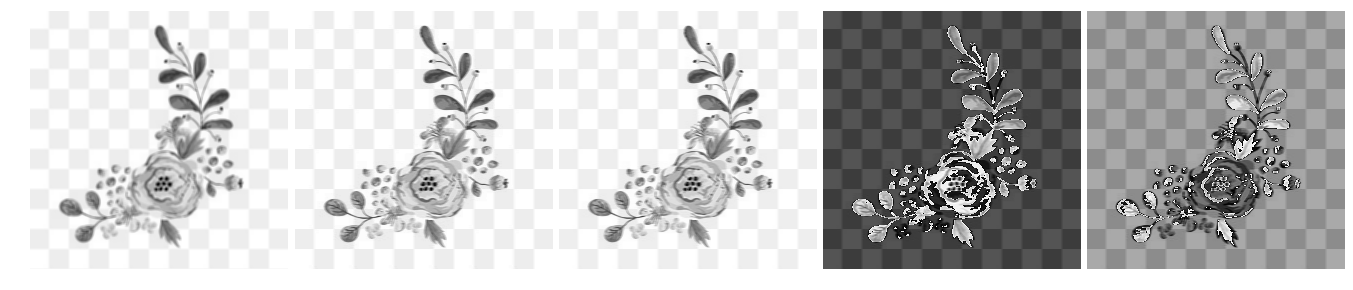

In [439]:
fig = np.array(img)
n=3.
h1 = np.ones((n,n))/(n*n)
h2 = np.zeros((n,n))/(n*n)
ha = h2[1::2]
ha[:,:] = 1/(n*n)
print 'h1= \n', h1, '\n'
print 'h2= \n', h2, '\n'

h3 = np.zeros((n,n))/(n*n)
hb = h3[1::2]
hb[:,:] = 3/(n*n)
print 'h3= \n', h3, '\n'

h4 = np.zeros((n,n))/(n*n)
hc = h4[1::2]
hc[:,:] = 4/(n*n)
print 'h4= \n', h4, '\n'

h5 = np.zeros((n,n))/(n*n)
hd = h5[1::2]
hd[:,:] = 5/(n*n)
print 'h5= \n', h5, '\n'

conv1 = signal.convolve(fig, h1, mode='valid')
conv2 = signal.convolve(fig, h2, mode='valid')
conv3 = signal.convolve(fig, h3, mode='valid')
conv4 = signal.convolve(fig, h4, mode='valid')
conv5 = signal.convolve(fig, h5, mode='valid')

#plt.subplot(122)
#plt.imshow(img, cmap='gray')
#plt.title('Imagem original', fontsize=16)

#plt.imshow(conv1, cmap='gray')
#plt.title(u'Convolução com a máscara 3x3', fontsize=16)
#plt.show()

#plt.sgubplot(122)
#plt.imshow(conv2, cmap='gray')
#plt.title(u'Convolução com o filtro h2', fontsize=16)

#plt.imshow(conv3, cmap='gray')
#plt.title(u'Convolução com o filtro h3', fontsize=16)
#plt.show()
disp([conv1, conv2, conv3, conv4, conv5], 5)

Nesse caso foram utilizados filtros que tinham valores diferentes de zeros apenas na faixa horizontal central. Podemos observar que o filtro da média perde o seu efeito. Esses efeitos podem ser utilizados para outras aplicações.

## Resolução Exercício 2

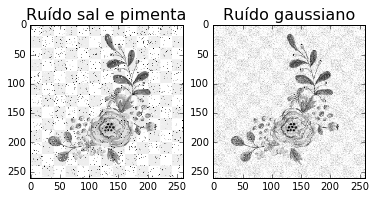

In [440]:
#Função que permite introduzir ruído sal e pimenta e ruído gaussiano na imagem.
s = skimage.util.random_noise(fig, mode='s&p', seed=None, clip=True)
s2 = skimage.util.random_noise(fig, mode='gaussian', seed=None, clip=True)

plt.subplot(121)
plt.imshow(s, cmap='gray')
plt.title(u'Ruído sal e pimenta', fontsize=16)
plt.subplot(122)
plt.imshow(s2, cmap='gray')
plt.title(u'Ruído gaussiano', fontsize=16)
plt.show()


#### Filtro Gaussiano Utilizando a função do Scipy.ndimage

Ruído Gaussiano

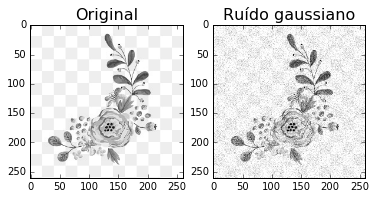

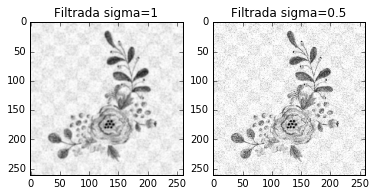

In [441]:
gfil1 = gaussian_filter(s2, sigma=1)
gfil2 = gaussian_filter(s2, sigma=0.5)

plt.subplot(121)
plt.imshow(fig, cmap='gray')
plt.title('Original', fontsize=16)

plt.subplot(122)
plt.imshow(s2, cmap='gray')
plt.title(u'Ruído gaussiano', fontsize=16)
plt.show()

plt.subplot(121)
plt.imshow(gfil1, cmap='gray')
plt.title('Filtrada sigma=1')

plt.subplot(122)
plt.imshow(gfil2, cmap='gray')
plt.title('Filtrada sigma=0.5')

plt.show()

Ruído Sal e Pimenta

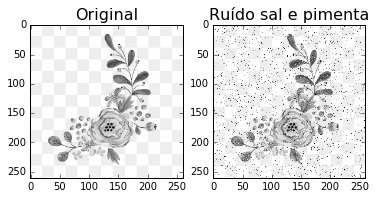

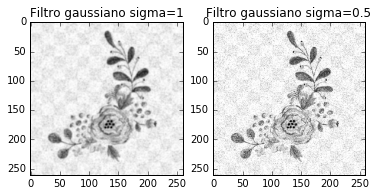

In [442]:
gfil3 = gaussian_filter(s2, sigma=1)
gfil4 = gaussian_filter(s2, sigma=0.5)

plt.subplot(121)
plt.imshow(fig, cmap='gray')
plt.title('Original', fontsize=16)

plt.subplot(122)
plt.imshow(s, cmap='gray')
plt.title(u'Ruído sal e pimenta', fontsize=16)
plt.show()

plt.subplot(121)
plt.imshow(gfil3, cmap='gray')
plt.title('Filtro gaussiano sigma=1')

plt.subplot(122)
plt.imshow(gfil4, cmap='gray')
plt.title('Filtro gaussiano sigma=0.5')

plt.show()

Nesse filtro é notado que quando utilizamos sigma=1, o ruído é reduzido e as propriedades importantes da imagem não é perdida, mas a imagem fica borrada. Entretando, quando utilizamos sigma=0.5, pode se notar que o ruído é reduzido e a imagem também fica borrada, dificultando uma melhor visualização dos traços característicos.

#### Filtro Gaussiano utilizando a Toolbox da Disciplina IA898

g1: 
[[ 0.31916777]
 [ 0.36166446]
 [ 0.31916777]]
g2: [[ 0.31916777  0.36166446  0.31916777]]


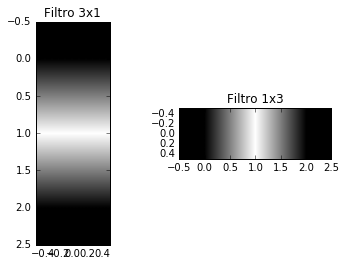

g3: 
[[ 0.63833554  0.68083223  0.63833554]
 [ 0.68083223  0.72332893  0.68083223]
 [ 0.63833554  0.68083223  0.63833554]]


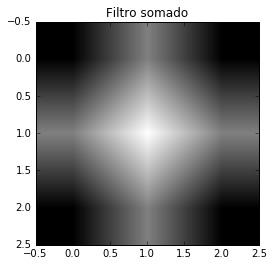

In [443]:
g1 = ia.gaussian((3,1), 1, [[4,0], [0,4]])
g1 = g1/g1.sum()
print 'g1: \n', g1

g2 = ia.gaussian((1,3), 1, [[4,0], [0, 4]])
g2 = g2/g2.sum()
print 'g2:', g2

plt.subplot(121)
plt.imshow(g1)
plt.title('Filtro 3x1')
plt.subplot(122)
plt.imshow(g2)
plt.title('Filtro 1x3')
plt.show()

g3 = g1 +g2
#g3 = g3/g3.sum()
print 'g3: \n', g3

plt.imshow(g3)
plt.title('Filtro somado')
plt.show()

Obs.: gostaria de avisar que foi utilizado a imshow para mostrar graficamente o filtro, e podemos observar que essa função interpola os valores de tons de cinza.

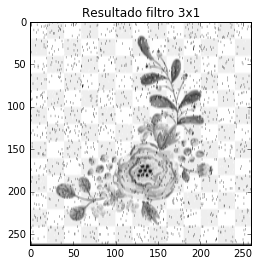

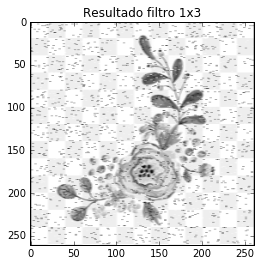

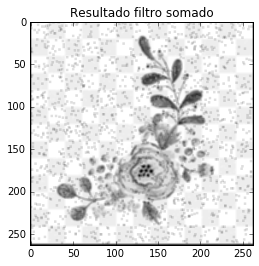

In [444]:
gfilterR = signal.convolve(s, g1)
gfilterC = signal.convolve(s, g2)
gfilterRC = signal.convolve(s, g3)

plt.imshow(gfilterR)
plt.title('Resultado filtro 3x1')
plt.show()

plt.imshow(gfilterC)
plt.title('Resultado filtro 1x3')
plt.show()

plt.imshow(gfilterRC)
plt.title('Resultado filtro somado')
plt.show()
#disp([gfilterR, gfilterC, gfilterRC], 3)

É interessante observar que quando utilizamos um filtro horizontal o ruído é reduzido apenas no eixo horizontal da imagem e quando utilizamos um filtro vertical o ruído é reduzido apenas para o eixo vertical. Quando os filtros 1x3 e 3x1 são somados ele se tornam o filtro 3x3 e reduz o ruído nas duas dimensões.

Ruído Sal e Pimenta

gfilter= 
[[ 0.005  0.061  0.005]
 [ 0.061  0.738  0.061]
 [ 0.005  0.061  0.005]]
gfilter2= 
[[ 0.075  0.124  0.075]
 [ 0.124  0.204  0.124]
 [ 0.075  0.124  0.075]]


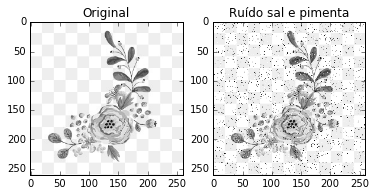

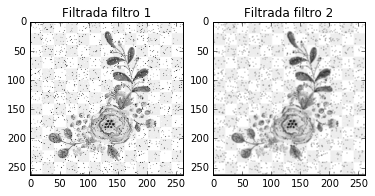

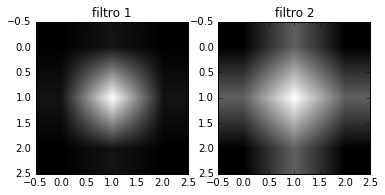

In [445]:
gfilter = ia.gaussian((3,3), 1, [[0.2,0],[0,0.2]])
gfilter = gfilter/gfilter.sum() # normalização
print 'gfilter= \n', gfilter.round(3)
G = ia.conv(s, gfilter)

gfilter2 = ia.gaussian((3,3), 1, [[1,0],[0,1]])
gfilter2 = gfilter2/gfilter2.sum() # normalização
print'gfilter2= \n', gfilter2.round(3)
G2 = ia.conv(s, gfilter2)

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(s, cmap='gray')
plt.title(u'Ruído sal e pimenta')
plt.show()

plt.subplot(121)
plt.imshow(G,cmap='gray')
plt.title('Filtrada filtro 1')
#fgauss = G[1:-1,1:-1] # tratamento de borda

plt.subplot(122)
plt.imshow(G2,cmap='gray')
plt.title('Filtrada filtro 2')
#fgauss = G[1:-1,1:-1] # tratamento de borda
plt.show()

#plt.imshow(fgauss)
#plt.show()
plt.subplot(121)
plt.imshow(gfilter)
plt.title('filtro 1')

plt.subplot(122)
plt.imshow(gfilter2)
plt.title('filtro 2')
plt.show()

Nesse caso, utilizamos diferentes filtros de 2 dimensões para reduzir o ruído. Para esse caso utilizamos a função do scipy que reduziu o ruído, porém também borrou a imagem.

Ruído Gaussiano

gfilter4= 
[[ 0.005  0.061  0.005]
 [ 0.061  0.738  0.061]
 [ 0.005  0.061  0.005]]
gfilter5= 
[[ 0.075  0.124  0.075]
 [ 0.124  0.204  0.124]
 [ 0.075  0.124  0.075]]


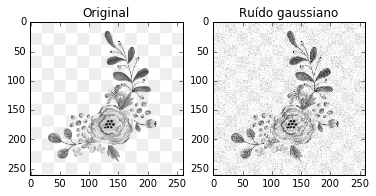

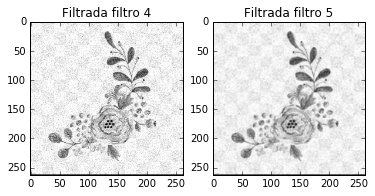

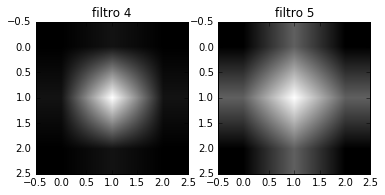

In [446]:
gfilter4 = ia.gaussian((3,3), 1, [[0.2,0],[0,0.2]])
gfilter4 = gfilter4/gfilter4.sum() # normalização
print 'gfilter4= \n', gfilter4.round(3)
G4 = ia.conv(s2, gfilter4)

gfilter5 = ia.gaussian((3,3), 1, [[1,0],[0,1]])
gfilter5 = gfilter5/gfilter5.sum() # normalização
print'gfilter5= \n', gfilter5.round(3)
G5 = ia.conv(s2, gfilter5)

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(s2, cmap='gray')
plt.title(u'Ruído gaussiano')
plt.show()

plt.subplot(121)
plt.imshow(G4,cmap='gray')
plt.title('Filtrada filtro 4')
#fgauss = G[1:-1,1:-1] # tratamento de borda

plt.subplot(122)
plt.imshow(G5,cmap='gray')
plt.title('Filtrada filtro 5')
#fgauss = G[1:-1,1:-1] # tratamento de borda
plt.show()

#plt.imshow(fgauss)
#plt.show()
plt.subplot(121)
plt.imshow(gfilter4)
plt.title('filtro 4')

plt.subplot(122)
plt.imshow(gfilter5)
plt.title('filtro 5')
plt.show()

Podemos observar que o toolbox da disciplina também reduziu o ruído gaussiano e o ruído sal e pimenta.